In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hypothesis = pd.read_csv('https://code.s3.yandex.net//datasets//hypothesis.csv')
orders = pd.read_csv('https://code.s3.yandex.net//datasets/orders.csv')
visitors = pd.read_csv('https://code.s3.yandex.net//datasets/visitors.csv')

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
orders['date'] = pd.to_datetime(orders['date']).dt.strftime('%d')
#orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d') )

In [5]:
visitors['date'] = pd.to_datetime(visitors['date']).dt.strftime('%d')
#visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d') )

In [6]:
visitors.head()

,date,group,visitors
0,01,A,719
1,02,A,619
2,03,A,507
3,04,A,717
4,05,A,756


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [9]:
#проверим количество пропусков в orders
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [10]:
#проверим количество пропусков в visitors
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [11]:
#посчитем явные дубликаты
print('кол-во явных дубликатов в visitors =', visitors.duplicated().sum())
print('кол-во явных дубликатов в orders =', orders.duplicated().sum())

кол-во явных дубликатов в visitors = 0
кол-во явных дубликатов в orders = 0


In [12]:
orders.sort_values(by='visitorId').tail(10)

,transactionId,visitorId,date,revenue,group
901,3402467119,4256040402,27,1630,A
588,3700356838,4256040402,20,17650,A
130,3650380616,4258103007,22,6145,B
1047,1266191879,4259830713,11,3190,A
662,1811671147,4266935830,29,78990,A
682,1216533772,4266935830,29,78990,B
886,51443164,4278982564,05,24744,A
576,2724331495,4279090005,04,6716,B
392,3796325351,4281247801,25,2640,B
974,836739159,4283872382,22,3806,B


In [13]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


- проверим поподают ли пользователи в обе группы
- сгрупперуем по пользователям и посчитаем уникальные группы
- отсортируем тех кто поподает больше чем в одну группу

In [14]:
oders_in_2_groups = (orders.groupby(by='visitorId')
           .agg({'group': pd.Series.nunique})
           .query('group > 1') ).reset_index(drop=False)

In [15]:
oders_in_2_groups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   visitorId  58 non-null     int64
 1   group      58 non-null     int64
dtypes: int64(2)
memory usage: 1.0 KB


Перезапишем датафрейм orders из которого удалим пользователей которые выходят в обе группы oders_in_2_groups

In [16]:
orders = orders[~orders['visitorId'].isin(oders_in_2_groups['visitorId'])]
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,15,1650,B
1,2804400009,3642806036,15,730,B
3,3797467345,1196621759,15,9759,B
4,2282983706,2322279887,15,2308,B
5,182168103,935554773,15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,14,16490,B
1192,2662137336,3733762160,14,6490,B
1193,2203539145,370388673,14,3190,A
1194,1807773912,573423106,14,10550,A


- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [17]:
#Применяем фреймворк ICE для приоритизации гипотез. Отсортировываем их по убыванию приоритета.
hypothesis['ICE'] = round(hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'], 2)
pd.set_option('max_colwidth', 200)
hypothesis[['Hypothesis', 'ICE']].sort_values(by = 'ICE',  ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


In [18]:
#Применяем фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']

hypothesis[['Hypothesis', 'RICE']].sort_values(by = 'RICE',  ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


In [19]:
hypothesis[['Hypothesis', 'ICE', 'RICE']].sort_values(by = 'RICE',  ascending=False)

,Hypothesis,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00,3.0


RICE отличактся на количество Reach пользователей 

In [20]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,15,1650,B
1,2804400009,3642806036,15,730,B
3,3797467345,1196621759,15,9759,B
4,2282983706,2322279887,15,2308,B
5,182168103,935554773,15,2210,B


Проанализируем A/B-тест:

# 1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [21]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,15,1650,B
1,2804400009,3642806036,15,730,B
3,3797467345,1196621759,15,9759,B
4,2282983706,2322279887,15,2308,B
5,182168103,935554773,15,2210,B


In [22]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()
datesGroups.head()

,date,group
0,15,B
7,15,A
45,16,A
47,16,B
55,01,A


Агрегируем значения. Вычислим максимальную дату. Для группы тоже рассчитаем максимум, и хотя она будет определённой, сделаем это, чтобы столбец 'group' не пропал из итогового вывода. Найдём число уникальных ID заказов и пользователей. Подсчитаем сумму средних чеков:
.agg({'date' : 'max', 'group' : 'max', 'orderId' : 'nunique', 'userId' : 'nunique', 'revenue' : 'sum'}). Применим методы к каждой строке датафрейма: apply(axis=1) и отсортируем результаты по столбцам 'date' и 'group': 

In [23]:
# получаем агрегированные кумулятивные по дням данные о заказах

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 
      'group' : 'max', 
      'transactionId' : 'nunique', 
      'visitorId' : 'nunique', 
      'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [24]:
ordersAggregated

,date,group,transactionId,visitorId,revenue
55,01,A,23,19,142779
66,01,B,17,17,59758
175,02,A,42,36,234381
173,02,B,40,39,221801
291,03,A,66,60,346854
...,...,...,...,...,...
533,29,B,510,490,4746610
757,30,A,460,437,3311413
690,30,B,531,511,4955833
958,31,A,468,445,3364656


In [25]:
visitors.head()

,date,group,visitors
0,01,A,719
1,02,A,619
2,03,A,507
3,04,A,717
4,05,A,756


In [26]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
.agg({'date' : 'max',
      'group' : 'max', 
      'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])


In [27]:
visitorsAggregated

,date,group,visitors
55,01,A,719
66,01,B,713
175,02,A,1338
173,02,B,1294
291,03,A,1845
...,...,...,...
533,29,B,17708
757,30,A,18037
690,30,B,18198
958,31,A,18736


In [28]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']


С помощью сортировки по дате проверим максимальную и минимальную дату в датафреймах cumulativeData и orders

In [29]:
cumulativeData.sort_values(by='date')

,date,group,orders,buyers,revenue,visitors
0,01,A,23,19,142779,719
1,01,B,17,17,59758,713
2,02,A,42,36,234381,1338
3,02,B,40,39,221801,1294
4,03,A,66,60,346854,1845
...,...,...,...,...,...,...
57,29,B,510,490,4746610,17708
58,30,A,460,437,3311413,18037
59,30,B,531,511,4955833,18198
60,31,A,468,445,3364656,18736


In [30]:
orders.sort_values(by='date')

,transactionId,visitorId,date,revenue,group
103,2951399376,2019355024,01,2550,B
148,4238948438,363280180,01,300,B
147,52260954,3967698036,01,990,A
97,2012801741,414545763,01,5555,B
145,735232225,611059232,01,8800,A
...,...,...,...,...,...
957,3759988715,1762249948,31,5170,B
930,3682739914,3910723394,31,19490,B
996,1998112401,1900893596,31,100,A
1022,2411823395,3788724847,31,2610,A


In [31]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

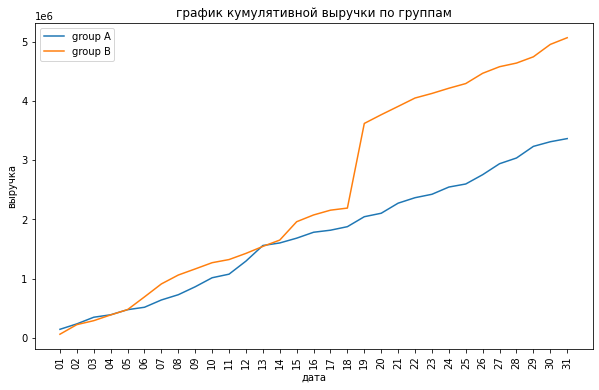

In [32]:
plt.figure(figsize=(10, 6))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='group A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='group B') 

plt.xlabel('дата')
plt.ylabel('выручка')
plt.title('график кумулятивной выручки по группам')
plt.xticks(rotation=90)
plt.legend()
plt.show()

В группе В видим что есть резкий перепад 18.08 возможно это какой то выброс слишком большой заказ или много заказов в этот день

# 2.Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

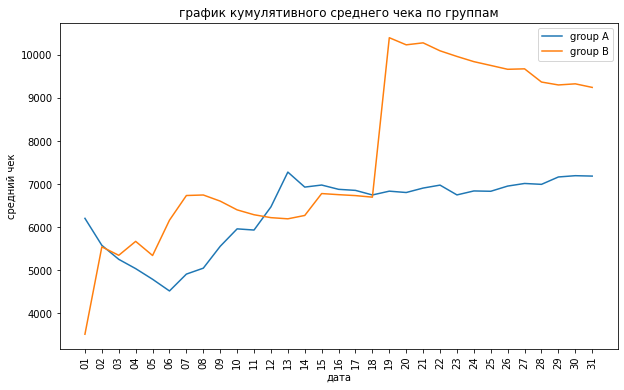

In [33]:
#Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:
plt.figure(figsize=(10, 6))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='group A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='group B')

plt.xlabel('дата')
plt.ylabel('средний чек')
plt.title('график кумулятивного среднего чека по группам')
plt.xticks(rotation=90)
plt.legend()
plt.show()

- так же видим что в группе В имеется резкий рост среднего чека 19.08 
-  в самом начале графики колеблются но скорее всего это изза того что было мало данных,  потом данные накомиливаются и графики выравниваются
- выброс в группе В мешает увидеть на каком среднем чеке стабилизируется граффик тк нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне

# 3.Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.


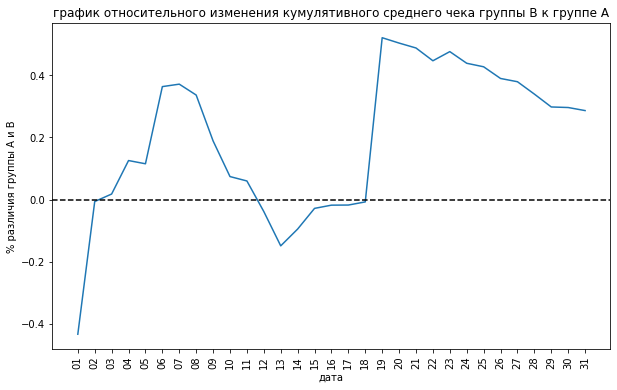

In [34]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(10, 6))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.xlabel('дата')
plt.ylabel('% различия группы А и В')
plt.title('график относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation=90)
plt.show()

график различия резко скачет. Где-то есть выбросы

# 4.Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

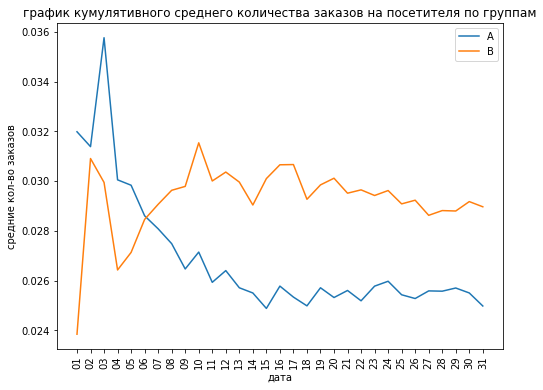

In [35]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(8, 6))

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
#plt.axis(["2019-08-01", '2019-08-31', 0, 0.038])

plt.xlabel('дата')
plt.ylabel('средние кол-во заказов')
plt.title('график кумулятивного среднего количества заказов на посетителя по группам')
plt.xticks(rotation=90)
plt.show()

среднее количество заказов на посетителя в группе В стабильно превышало количество заказов на посетителя чем в группе А на всем периоде теста за исключениие начала когда скорее всего было мало данных

# 5.Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

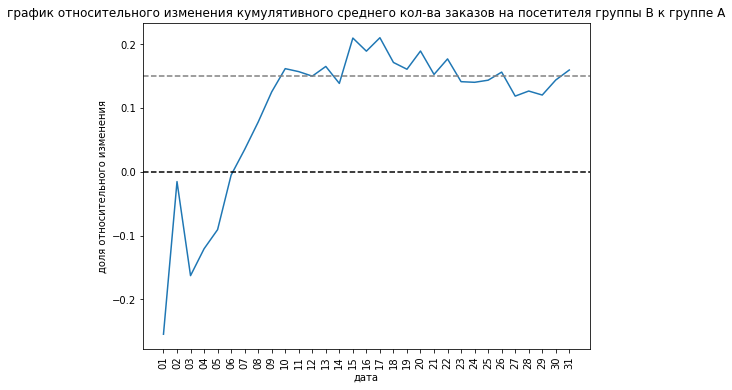

In [36]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(8, 6))

plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1) #, 
         #label="Относительный прирост кумулятивного среднего кол-ва заказов на посетителя группы B относительно группы A")
#plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')

#plt.axis(["2019-08-01", '2019-08-31', -0.2, 0.45])
plt.xticks(rotation=90)
plt.xlabel('дата')
plt.ylabel('доля относительного изменения')
plt.title('график относительного изменения кумулятивного среднего кол-ва заказов на посетителя группы B к группе A')
plt.xticks(rotation=90)
plt.show()

- видно что кол-во заказов в основном больше
- но также видно что кол-ва заказов на посетителя ещё не установилось, тк график то поднимается то опускается
- и также нужно проанализировать аномалии

# 6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

Подсчитаем количество заказов по пользователям и посмотрим на результат:

In [37]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.sort_values(by = 'transactionId', ascending=False)

,visitorId,transactionId
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
...,...,...
331,1438226485,1
332,1452540367,1
333,1455323168,1
334,1455861274,1


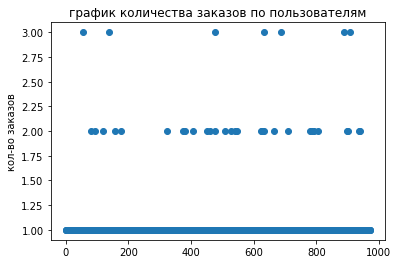

In [38]:
#Построим точечный график количества заказов по пользователям
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['transactionId'])

plt.ylabel('кол-во заказов')
plt.title('график количества заказов по пользователям')
plt.show()

видно что больштнство польщователей заказывает 1 раз но также достаточно много пользователей заказывают и по 2 раза. пока не понятно можно ли считать 2-3 раза выбросами. больше 3 раз можно считать выбросами тк их очень мало

# 7.Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [39]:
ordersByUsers[ordersByUsers['transactionId'] == 2].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 82 to 940
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   visitorId      29 non-null     int64
 1   transactionId  29 non-null     int64
dtypes: int64(2)
memory usage: 696.0 bytes


In [40]:
ordersByUsers

,visitorId,transactionId
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1
...,...,...
968,4259830713,1
969,4278982564,1
970,4279090005,1
971,4281247801,1


In [41]:
print(np.percentile(ordersByUsers['transactionId'], [95, 99]))

[1. 2.]


Не более 5% пользователей оформляли больше чем 2 заказов. И 1% пользователей заказывали более 4 раз. 

Разумно выбрать 3 и больше заказов на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

оставляем только пользователей с 1-2 заказами 

# 8.Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

In [42]:
orders.sort_values(by = 'revenue', ascending=False).head()

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,19,1294500,B
1196,3936777065,2108080724,15,202740,B
1136,666610489,1307669133,13,92550,A
744,3668308183,888512513,27,86620,B
743,3603576309,4133034833,09,67990,A


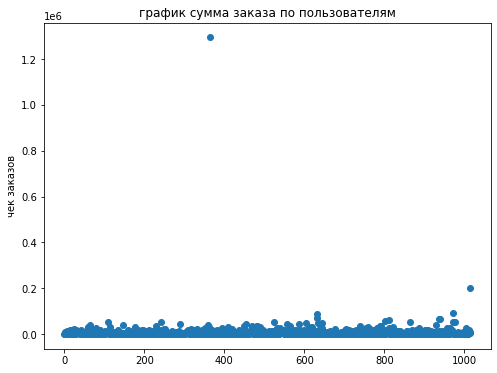

In [43]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(8, 6))

plt.scatter(x_values, orders['revenue'])
plt.ylabel('чек заказов')
plt.title('график сумма заказа по пользователям')
plt.show()

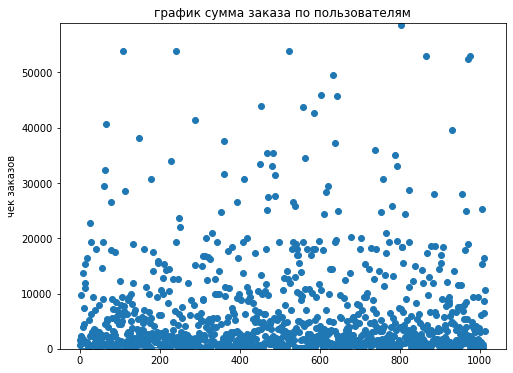

In [44]:
plt.figure(figsize=(8, 6))

x_values.plot(ylim=(0, 59000))

plt.scatter(x_values, orders['revenue'])
plt.ylabel('чек заказов')
plt.title('график сумма заказа по пользователям')
plt.show()

явно видим несколько аномалий в 200т и 1млн. вероятно еще аномалии будут считася заказы около 100т

# 9.Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [45]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


Не более 5% заказов дороже 28000 рублей и не более 1% дороже 58233 рублей.
Вопрос: значит все что выше 28000 сччитаем наномалиями????

# 10.Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

In [46]:
orders_B = orders.query('group == "B"')
orders_A = orders.query('group == "A"')

In [47]:
orders_B['visitorId'].nunique()

528

In [48]:
orders_A['visitorId'].nunique()

445

In [49]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,15,1650,B
1,2804400009,3642806036,15,730,B
3,3797467345,1196621759,15,9759,B
4,2282983706,2322279887,15,2308,B
5,182168103,935554773,15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,14,16490,B
1192,2662137336,3733762160,14,6490,B
1193,2203539145,370388673,14,3190,A
1194,1807773912,573423106,14,10550,A


- Посчитаем статистическую значимость различия в среднем количестве заказов между группами.
- Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['visitorId', 'orders'].
- В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [50]:
#ordersByUsersA.sort_values(by = 'orders', ascending=False ).head(19)
#ordersByUsersA[ordersByUsersA['orders'] == 0].sort_values(by = 'orders', ascending=False )

In [51]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

In [52]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,15,1650,B
1,2804400009,3642806036,15,730,B
3,3797467345,1196621759,15,9759,B
4,2282983706,2322279887,15,2308,B
5,182168103,935554773,15,2210,B


In [53]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

In [54]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(cumulativeDataA[['date', 'orders']], left_on='date', right_on='date', how='left')
    .merge(cumulativeDataB[['date', 'orders']], left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(cumulativeDataA[['date', 'visitors']], left_on='date', right_on='date', how='left')
    .merge(cumulativeDataB[['date', 'visitors']], left_on='date', right_on='date', how='left')
)

In [55]:
data.rename(columns = {'orders_x': 'ordersCummA', 'orders_y': 'ordersCummB', 'visitors_x': 'visitorsCummA', 'visitors_y': 'visitorsCummB' }, inplace = True)

In [56]:
data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummA,ordersCummB,visitorsPerDateA,visitorsPerDateB,visitorsCummA,visitorsCummB
0,01,23,142779,17,59758,23,17,719,713,719,713
1,02,19,91602,23,162043,42,40,619,581,1338,1294
2,03,24,112473,14,67049,66,54,507,509,1845,1803
3,04,11,41176,14,96890,77,68,717,770,2562,2573
4,05,22,86383,21,89908,99,89,756,707,3318,3280


<div class="alert alert-info">
сократил код

In [57]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

In [58]:
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')

0        0
1        0
2        0
3        0
4        0
        ..
18286    0
18287    0
18288    0
18289    0
18290    0
Name: orders, Length: 18291, dtype: int64

In [59]:
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')]

[0      1
 1      1
 2      1
 3      1
 4      1
       ..
 440    1
 441    1
 442    1
 443    1
 444    1
 Name: orders, Length: 445, dtype: int64,
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 18286    0
 18287    0
 18288    0
 18289    0
 18290    0
 Name: orders, Length: 18291, dtype: int64]

In [60]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [61]:
print('p-value =', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('относительный выйгрыш группы B =', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.011
относительный выйгрыш группы B = 0.160


<div class="alert alert-info">
    
    немного изменил
- По сырым данным есть различия в среднем количестве заказов групп A и B. 
- p-value = 0.011 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем.
- относительный выйгрыш группы B равен 16%

# 11.Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

<div class="alert alert-info">

Сформулируем гипотезы:
- **Нулевая гипотеза**: Статистически значимых различий в среднем чеке между группами А и В по сырым данным **НЕТ**.
- **Альтернативная гипотеза**: Статистически значимые различия в среднем чеке между группами А и В по сырым данным **ЕСТЬ**.
    
Выберем значение **alpha** = 0,05
Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным и проанализируем A/B-тест

In [62]:
print('P-value =', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value = 0.829
0.287


- P-value больше 0.05. Значит, нет причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия. 

<div class="alert alert-info">

средний чек группы А ниже среднего чека группы В. по сырым данным
<div>

# 12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

<div class="alert alert-info"> 
    
- Примем за аномальных пользователей тех, кто совершил больше двух заказов и дороже 26785 р    
- удалим аномальных пользователей


In [63]:
orders_anomal = np.percentile(ordersByUsers['transactionId'], 99)
revenue_anomal = np.percentile(orders['revenue'], 95)

In [64]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > orders_anomal]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > orders_anomal]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_anomal ]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [65]:
print('аномальные пользователи')
abnormalUsers

аномальные пользователи


568      113298937
1099     148427295
928      204675465
33       249864742
684      358944393
648      382846391
58       611059232
751      689129267
1137     759473111
77       787824685
654      816783716
339      834731816
949      887908475
744      888512513
563      935349363
709      950626008
551     1010866419
1103    1164614297
137     1211585711
1136    1307669133
421     1357170471
549     1367935136
562     1452540367
1121    1604853044
1038    1605520752
420     1606766439
425     1920142716
1196    2108080724
211     2108163459
570     2247666522
287     2254456485
131     2254586615
1006    2261934787
273     2278620397
755     2279926127
1142    2606908679
347     2742574263
527     2837914161
925     2840985286
890     2853587382
530     2912540959
73      2947100995
173     2953427180
310     2988190573
960     2999642019
208     3118156181
481     3177790019
78      3288820196
746     3321013705
728     3357398384
867     3372131337
1087    3590655705
409     3908

In [66]:
print('количество аномальных пользователей =', abnormalUsers.shape[0])

количество аномальных пользователей = 58


Узнаем, как действия аномальных пользователей повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным.

подготовим выборки кол-ва заказов по пользователям по группам теста:

In [67]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим статистический критерий Манна-Уитни к полученным выборкам:

<div class="alert alert-info">
    
Сформулируем гипотезы:
- **Нулевая гипотеза**:Статистически значимых различий в среднем количестве заказов между группами А и В по **очищенным** данным **НЕТ**.
- **Альтернативная гипотеза**: Статистически значимые различия в среднем количестве заказов между группами А и В по **очищенным** данным **ЕСТЬ**.
    
Выберем значение **alpha** = 0,05
Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по **«очищенным»** данным и проанализируем A/B-тест снова

In [68]:
print('различия в среднем количестве заказов на посетителя между группами')
print()
print('p-value по сырым данным =', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('относительный выигрыш группы B по сырым данным =', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))
print()
print('p-value по очищенным данным =', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('относительный выигрыш группы B по очищенным данным =', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

различия в среднем количестве заказов на посетителя между группами

p-value по сырым данным = 0.011
относительный выигрыш группы B по сырым данным = 0.160

p-value по очищенным данным = 0.012
относительный выигрыш группы B по очищенным данным = 0.182


Результаты по среднему количеству заказов практически не изменились, значит все равно отвергаем нулевую гипотезу

# 13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

<div class="alert alert-info">
    
Сформулируем гипотезы:
- **Нулевая гипотеза**:Статистически значимых различий в среднем чеке  заказов между группами А и В по **очищенным** данным **НЕТ**.
- **Альтернативная гипотеза**: Статистически значимые различия в среднем чеке  заказов между группами А и В по **очищенным** данным **ЕСТЬ**.
    
Выберем значение **alpha** = 0,05
Посчитаем статистическую значимость различий в среднем чеке заказов на посетителя между группами по **«очищенным»** данным и проанализируем A/B-тест снова

In [69]:
print('p-value по очищенным данным=','{0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and (orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],orders[
                    np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],)[1]))

p-value по очищенным данным= 0.646


In [70]:
print( "{0:.3f}".format(orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormalUsers)),)
]['revenue'].mean()/ orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)
]['revenue'].mean() - 1))

-0.048


<div class="alert alert-info">
по сырам данным средний чек - новое
    
- по неочищеным данным : P-value =  0.829 и относительный выйгрыш группы B = 28,7%    
- по очищеным данным: p-value = 0.646 и относительный выйгрыш группы B = 4,8%    

<div class="alert alert-info">

- P-value уменьшился но все равно гораздо больше 0,05 , а разница между сегментами сократилась с 28,7% до 4,8%.
- получается выйгрыш группы B стал = 4,8%

- p-value > 0,05 значит нулевую гипотезу о том что различий между группами нет - **не отвергаем**
, да еще и выйгрыш стал не очень большой, получается считать, что в среднем чеке есть различия причин - нет.

# 14. Примите решение по результатам теста и объясните его. Варианты решений:

- Есть статистически значимые различия по среднему количеству заказов между группами А и В по «сырым», ни по данным после фильтрации аномалий. в группе В больше заказов.
- есть статистически значимые различия по среднему чеку между группами по «сырым» данным, после фильтрации аномалий средний чек в группе В больше чем в группе А на 4,8%;

тест можно остановить, различия между группами точно есть. количество заказов в группе В явно больше , но вот средний чек в группе В выше всего на 4,8 % .



